## **Data Understanding (Eksplorasi Data)**

In [1332]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [1333]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [1334]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


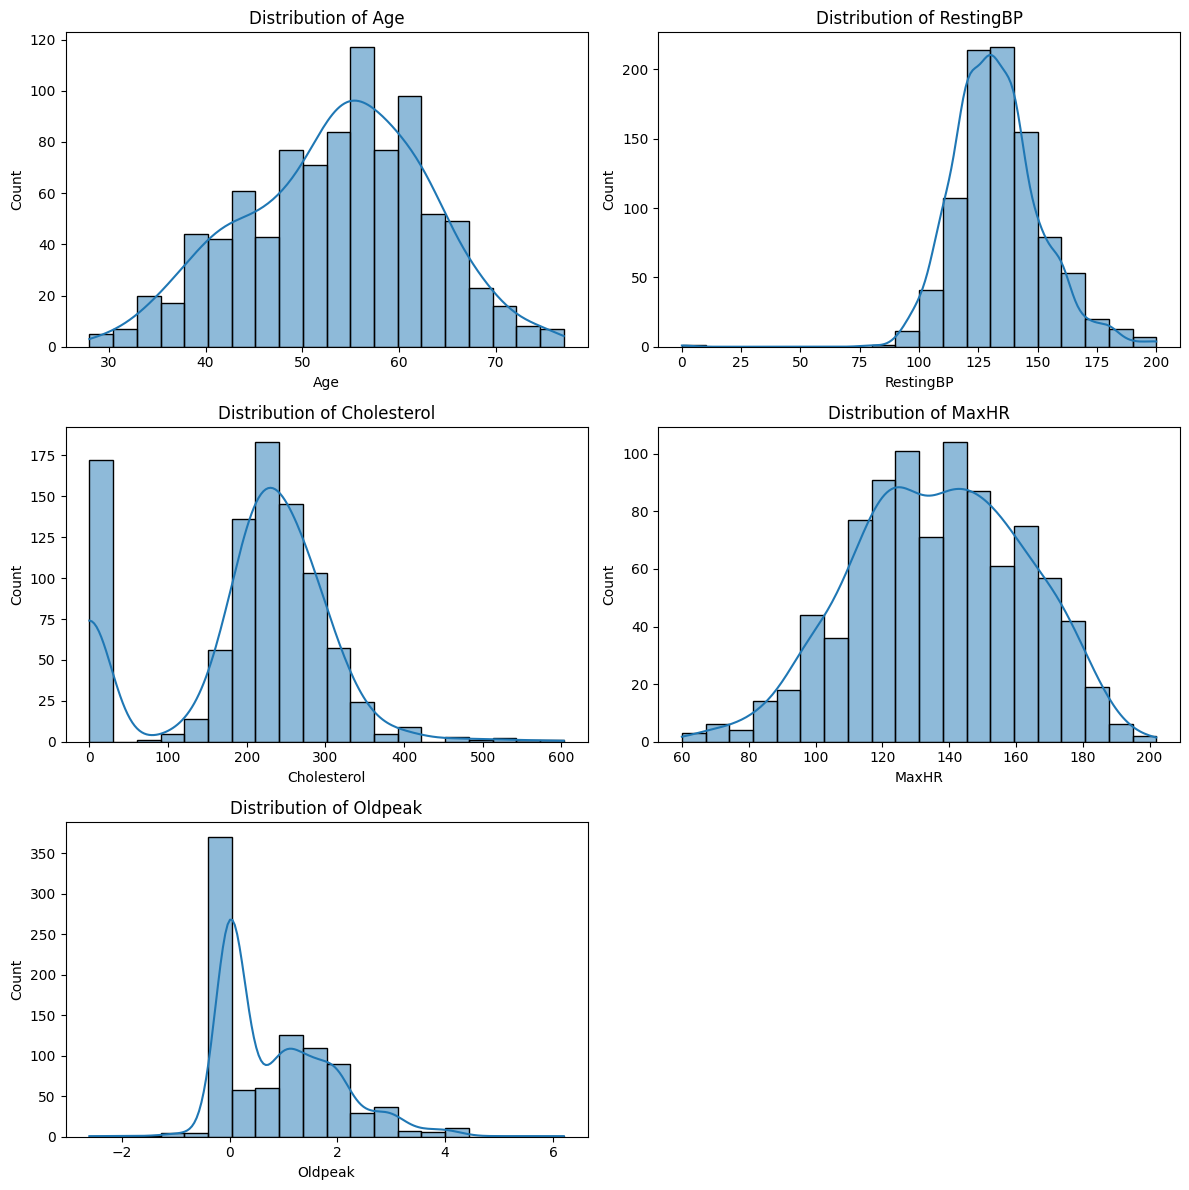

In [1335]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(12, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


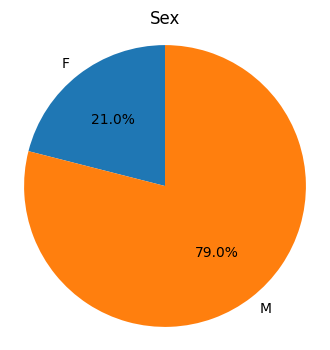

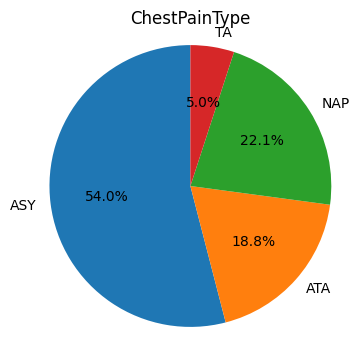

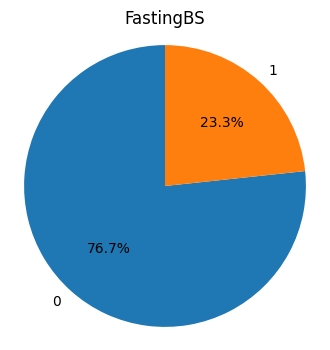

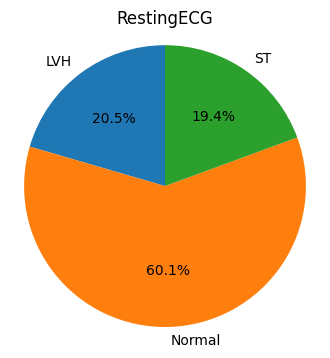

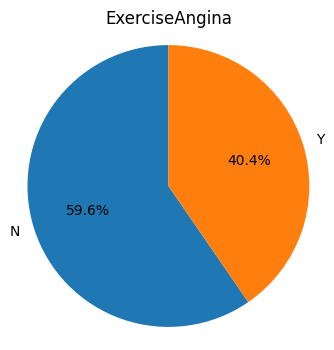

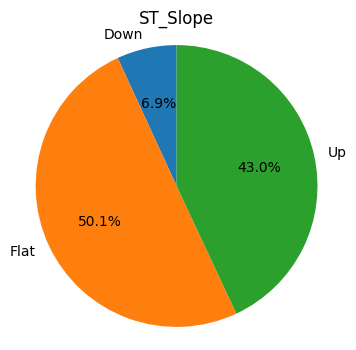

In [1336]:
import matplotlib.pyplot as plt

categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in categorical_columns:
    plt.figure(figsize=(4, 4))
    counts = df[column].value_counts().sort_index()
    labels = counts.index.astype(str)
    sizes = counts.values
    percentages = [f'{p:.1f}%' for p in 100 * sizes / sizes.sum()]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{column}')
    plt.axis('equal')
    plt.show()


# **Data Preparation (Cleaning, Encoding, Splitting)**

In [1337]:
print("Jumlah data duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

Jumlah data duplikat: 0


In [1338]:
df = df.dropna()

In [1339]:
from sklearn.preprocessing import LabelEncoder

print("Kolom kategorikal:", df.select_dtypes(include=['object']).columns.tolist())
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])
print("Kolom setelah encoding:", df.dtypes)


Kolom kategorikal: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Kolom setelah encoding: Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


In [1340]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

In [1341]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [1342]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [1343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train data shape: {X_train.shape}, Test data shape: {X_test.shape}')


Train data shape: (734, 11), Test data shape: (184, 11)


# **Data Clustering (K-Means)**

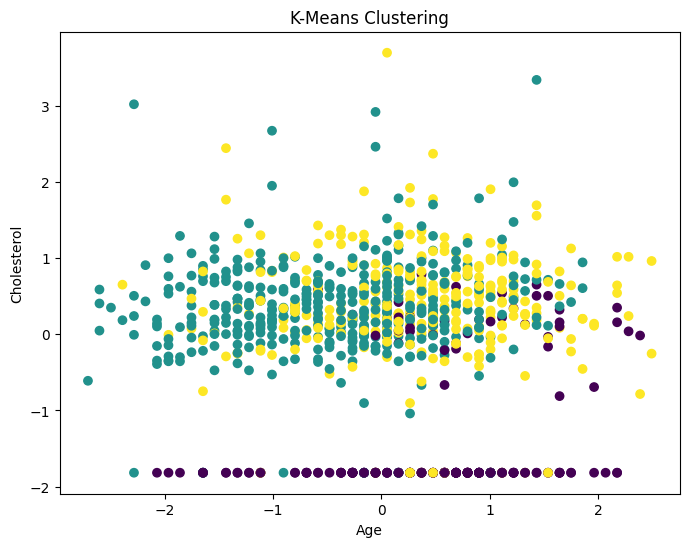

In [1344]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Cholesterol'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('K-Means Clustering')
plt.show()


In [1345]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

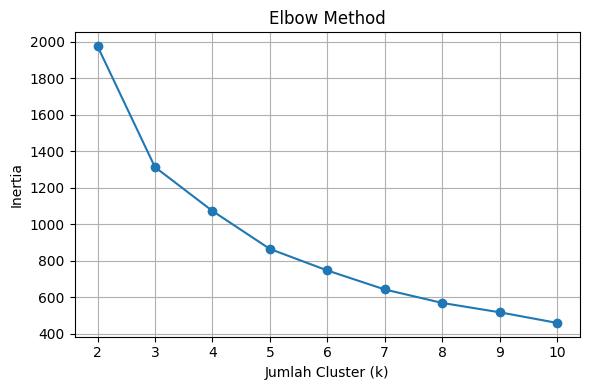

In [1346]:
k_range = range(2, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.tight_layout()
plt.show()

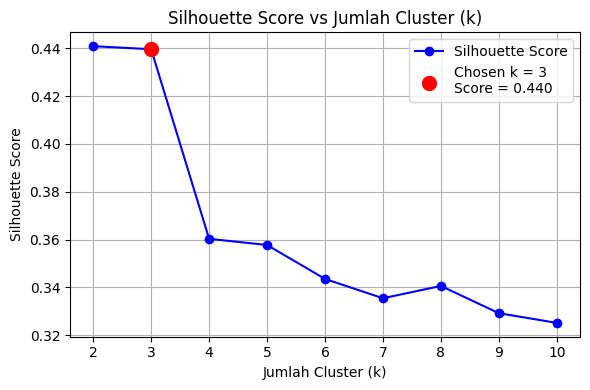

In [1347]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = list(range(2, 11))
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df) 
    score = silhouette_score(pca_df, labels)
    silhouette_scores.append(score)

highlight_k = 3

if highlight_k in K:
    idx = list(K).index(highlight_k)
    highlight_score = silhouette_scores[idx]
else:
    highlight_score = None

plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, marker='o', color='blue', label='Silhouette Score')


if highlight_score is not None:
    plt.scatter(highlight_k, highlight_score, color='red', s=100, zorder=5,
                label=f'Chosen k = {highlight_k}\nScore = {highlight_score:.3f}')

plt.title('Silhouette Score vs Jumlah Cluster (k)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

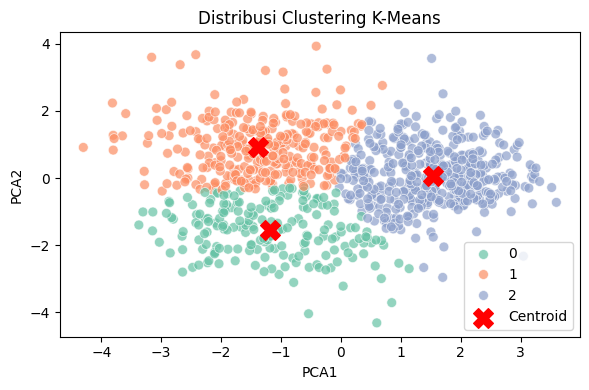

In [1348]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(pca_df)


pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=50, alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroid')
plt.title(f'Distribusi Clustering K-Means')
plt.legend()
plt.tight_layout()
plt.show()

In [1349]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

silhouette_avg = silhouette_score(pca_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

ch_score = calinski_harabasz_score(pca_df, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.4f}")

db_score = davies_bouldin_score(pca_df, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.4f}")

Silhouette Score: 0.5002
Calinski-Harabasz Index: 1090.3298
Davies-Bouldin Index: 0.7701


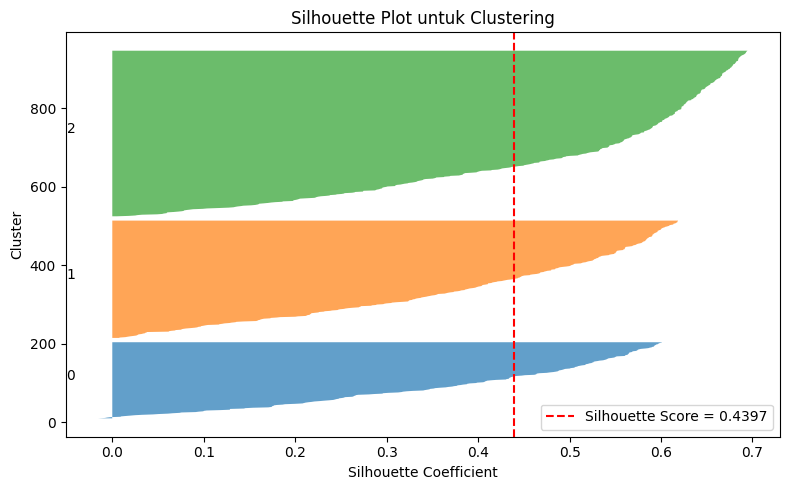

In [1350]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_vals = silhouette_samples(pca_df[['PCA1', 'PCA2']], cluster_labels)
sil_score = silhouette_score(pca_df[['PCA1', 'PCA2']], cluster_labels)

n_clusters = len(np.unique(cluster_labels))
y_lower = 10

plt.figure(figsize=(8, 5))
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=sil_score, color="red", linestyle="--", label=f"Silhouette Score = {sil_score:.4f}")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot untuk Clustering")
plt.legend()
plt.tight_layout()
plt.show()

# **Data Modeling (C4.5 Decision Tree dan Naive Bayes)**

In [1351]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [1352]:
# Convert continuous target variable into binary classification (e.g., threshold at 0.5)
y_train_binary = (y_train > 0.5).astype(int)  # Adjust threshold as needed

# Now fit the model with the binary labels
clf_c4_5 = DecisionTreeClassifier(random_state=42)
clf_c4_5.fit(X_train, y_train_binary)

DecisionTreeClassifier(random_state=42)

In [1353]:
# Convert continuous target variable to binary classification (threshold at 0.5)
y_train_binary = (y_train > 0.5).astype(int)  # Adjust threshold as needed

# Now fit the Naive Bayes model with the binary labels
clf_naive_bayes = GaussianNB()
clf_naive_bayes.fit(X_train, y_train_binary)


GaussianNB()

In [1354]:
y_pred_c4_5 = clf_c4_5.predict(X_test)
y_pred_naive_bayes = clf_naive_bayes.predict(X_test)

# **Model Evaluation (Evaluasi Model)**

In [1355]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_score:.4f}")

db_score = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score:.4f}")

Silhouette Score: 0.1781
Calinski-Harabasz Index: 164.1221
Davies-Bouldin Index: 2.0472


In [1356]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [1357]:
# Convert continuous target variable into binary classification (e.g., threshold at 0.5)
y_train_binary = (y_train > 0.5).astype(int)  # Adjust threshold based on your data
y_test_binary = (y_test > 0.5).astype(int)

# Now fit the model and predict
clf_c4_5.fit(X_train, y_train_binary)
y_pred_c4_5 = clf_c4_5.predict(X_test)

# Calculate accuracy
acc_c4_5 = accuracy_score(y_test_binary, y_pred_c4_5)
print(f'Accuracy for C4.5: {acc_c4_5}')

# If using Naive Bayes
clf_naive_bayes.fit(X_train, y_train_binary)
y_pred_naive_bayes = clf_naive_bayes.predict(X_test)
acc_nb = accuracy_score(y_test_binary, y_pred_naive_bayes)
print(f'Accuracy for Naive Bayes: {acc_nb}')


Accuracy for C4.5: 0.782608695652174
Accuracy for Naive Bayes: 0.842391304347826


In [1358]:

# Now fit the models with binary labels
clf_c4_5.fit(X_train, y_train_binary)
y_pred_c4_5 = clf_c4_5.predict(X_test)

clf_naive_bayes.fit(X_train, y_train_binary)
y_pred_naive_bayes = clf_naive_bayes.predict(X_test)

# Now calculate the confusion matrix (classification metrics)
from sklearn.metrics import confusion_matrix

cm_c4_5 = confusion_matrix(y_test_binary, y_pred_c4_5)
cm_nb = confusion_matrix(y_test_binary, y_pred_naive_bayes)

print("Confusion Matrix for C4.5:")
print(cm_c4_5)

print("Confusion Matrix for Naive Bayes:")
print(cm_nb)


Confusion Matrix for C4.5:
[[64 13]
 [27 80]]
Confusion Matrix for Naive Bayes:
[[65 12]
 [17 90]]


In [1359]:
report_c4_5 = classification_report(y_test_binary, y_pred_c4_5)
report_nb = classification_report(y_test_binary, y_pred_naive_bayes)


In [1360]:

fpr_c4_5, tpr_c4_5, _ = roc_curve(y_test_binary, clf_c4_5.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, clf_naive_bayes.predict_proba(X_test)[:, 1])


In [1361]:
auc_c4_5 = roc_auc_score(y_test_binary, clf_c4_5.predict_proba(X_test)[:, 1])
auc_nb = roc_auc_score(y_test_binary, clf_naive_bayes.predict_proba(X_test)[:, 1])


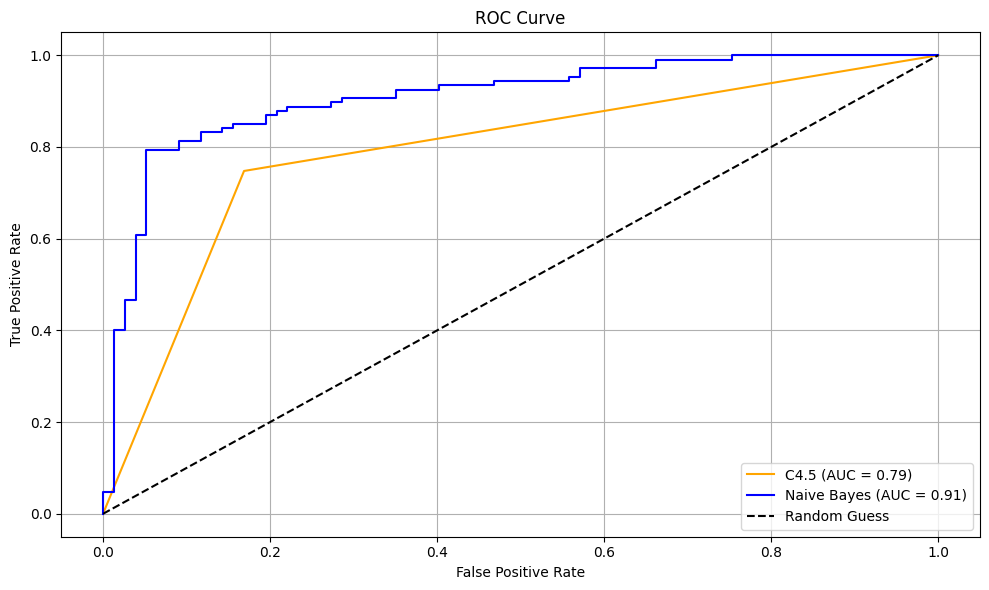

In [1362]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_c4_5, tpr_c4_5, label=f'C4.5 (AUC = {auc_c4_5:.2f})', color='orange')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

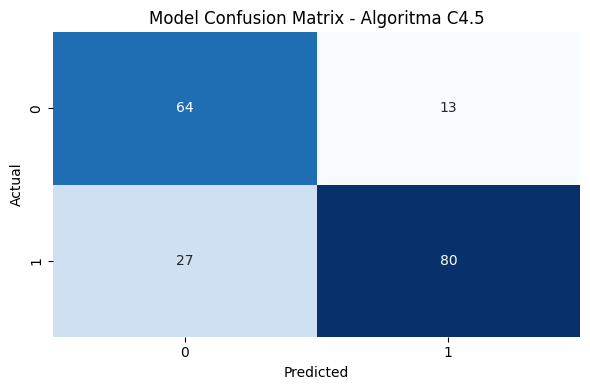

In [1363]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_c4_5, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model Confusion Matrix - Algoritma C4.5')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

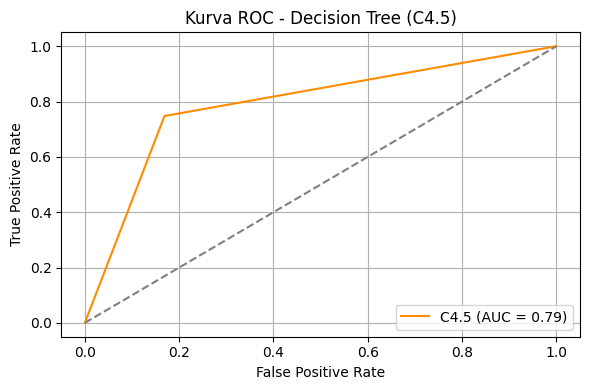

In [1364]:
plt.figure(figsize=(6, 4))
plt.plot(fpr_c4_5, tpr_c4_5, label=f'C4.5 (AUC = {auc_c4_5:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Decision Tree (C4.5)')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

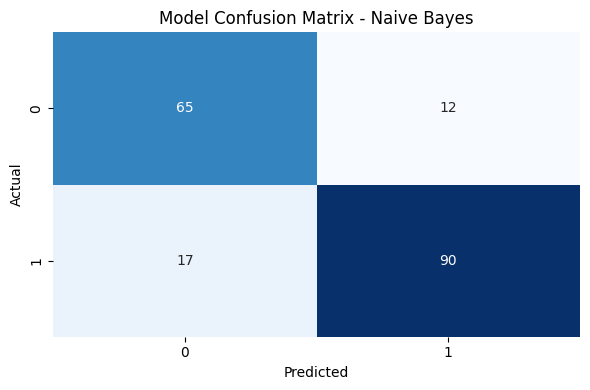

In [1365]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

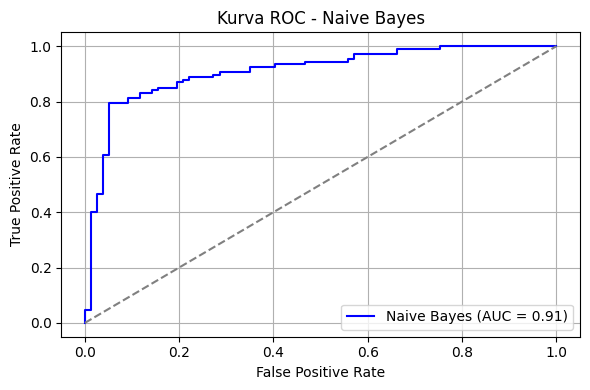

In [1366]:
plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Naive Bayes')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# **Deployment**

In [1367]:
import joblib

# Simpan model C4.5 yang sudah dilatih
joblib.dump(clf_c4_5, "heart_model.pkl")


['heart_model.pkl']

In [1368]:
import joblib
from sklearn.cluster import KMeans


# Simpan model K-Means ke dalam file
joblib.dump(kmeans, "kmeans_model.pkl")


['kmeans_model.pkl']

In [1369]:
!pip install pyngrok



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1370]:
!ngrok config add-authtoken 2wuc034FVMdVMO6XZw7U88Qebuk_83CNmbLN9KrESbaWK7MZt

Authtoken saved to configuration file: /Users/strange/Library/Application Support/ngrok/ngrok.yml


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from pyngrok import ngrok  # Import ngrok

# Set up page config
st.set_page_config(page_title="Prediksi Risiko Penyakit Jantung", page_icon="❤️")
st.title("❤️ Prediksi Risiko Penyakit Jantung")
st.write("Aplikasi ini membantu memprediksi apakah seseorang berisiko terkena penyakit jantung berdasarkan data kesehatan sederhana.")

# Input User
st.header("📋 Masukkan Data Pasien")

# User input
age = st.number_input("Umur", min_value=1, max_value=120, value=50)
sex = st.selectbox("Jenis Kelamin", ["Laki-laki", "Perempuan"])
cp_type = st.selectbox("Jenis Nyeri Dada", ["ATA", "NAP", "ASY", "TA"])
resting_bp = st.number_input("Tekanan Darah Saat Istirahat (mmHg)", min_value=80, max_value=200, value=120)
chol = st.number_input("Kolesterol (mg/dL)", min_value=100, max_value=600, value=200)
fasting_bs = st.radio("Apakah gula darah puasa > 120 mg/dL?", ["Ya", "Tidak"])
rest_ecg = st.selectbox("Hasil EKG Saat Istirahat", ["Normal", "ST", "LVH"])
max_hr = st.number_input("Detak Jantung Maksimum (BPM)", min_value=60, max_value=250, value=150)
ex_angina = st.radio("Nyeri Dada Saat Olahraga?", ["Ya", "Tidak"])
oldpeak = st.number_input("Oldpeak (Penurunan ST)", min_value=0.0, max_value=6.0, value=1.0)
st_slope = st.selectbox("Kemiringan ST Saat Olahraga", ["Up", "Flat", "Down"])

# Label encoding sesuai data model
def encode_inputs():
    label_map = {
        'Sex': {"F": 0, "M": 1},
        'ChestPainType': {"ASY": 0, "ATA": 1, "NAP": 2, "TA": 3},
        'RestingECG': {"LVH": 0, "Normal": 1, "ST": 2},
        'ExerciseAngina': {"N": 0, "Y": 1},
        'ST_Slope': {"Down": 0, "Flat": 1, "Up": 2}
    }

    return pd.DataFrame({
        'Age': [age],
        'Sex': [label_map['Sex']["M" if sex == "Laki-laki" else "F"]],
        'ChestPainType': [label_map['ChestPainType'][cp_type]],
        'RestingBP': [resting_bp],
        'Cholesterol': [chol],
        'FastingBS': [1 if fasting_bs == "Ya" else 0],
        'RestingECG': [label_map['RestingECG'][rest_ecg]],
        'MaxHR': [max_hr],
        'ExerciseAngina': [label_map['ExerciseAngina']["Y" if ex_angina == "Ya" else "N"]],
        'Oldpeak': [oldpeak],
        'ST_Slope': [label_map['ST_Slope'][st_slope]]
    })

# Load model
@st.cache_resource
def load_model():
    return joblib.load("heart_model.pkl")  # Pastikan model ini sudah kamu simpan

# Load KMeans model (Clustering)
@st.cache_resource
def load_kmeans():
    return joblib.load("kmeans_model.pkl")  # Pastikan model KMeans ini sudah kamu simpan

model = load_model()
kmeans_model = load_kmeans()

# Mapping cluster numbers to human-readable labels
cluster_labels = {
    0: "Cluster Sehat",
    1: "Cluster Rentan",
    2: "Cluster Berisiko Tinggi"
}

# Tombol Prediksi
if st.button("🔍 Prediksi Sekarang"):
    input_df = encode_inputs()
    st.write("🔎 Data yang Diproses:", input_df)
    
    # Prediksi menggunakan model Naive Bayes
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    
    # Prediksi cluster menggunakan KMeans
    cluster_label = kmeans_model.predict(input_df)[0]

    # Menampilkan hasil prediksi
    st.subheader("🧠 Hasil Prediksi")
    if prediction == 1:
        st.error(f"⚠️ Anda kemungkinan **berisiko terkena penyakit jantung**. (Skor Probabilitas: {probability:.2f})")
        st.write("👉 Disarankan untuk konsultasi ke dokter dan mulai gaya hidup sehat.")
    else:
        st.success(f"✅ Anda kemungkinan **tidak berisiko** terkena penyakit jantung. (Skor Probabilitas: {probability:.2f})")
        st.write("👍 Tetap jaga pola makan, olahraga rutin, dan periksa kesehatan secara berkala.")
    
    # Menampilkan hasil cluster dalam kata-kata
    st.write(f"🎯 Data ini berada pada **{cluster_labels.get(cluster_label, 'Unknown Cluster')}**.")
    st.write("🔍 Cluster ini menunjukkan karakteristik tertentu yang dapat membantu dalam penentuan risiko.")

st.markdown("---")
st.caption("Model ini dibuat hanya untuk tujuan edukasi dan tidak menggantikan diagnosis medis profesional.")


Overwriting app.py


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [1372]:
from pyngrok import ngrok
import threading
import time
import os

In [1373]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://c36b-2404-8000-1024-76f0-9f9-1b24-c3d9-5168.ngrok-free.app" -> "http://localhost:8501"


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
